In [4]:
import numpy as np 
import scan_plot_and_analysis as spa
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import diptest
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# Sharpness functions (global and local)
def variance_func(img, lenx, leny):
    u = np.mean(img)
    N = lenx
    M = leny

    f_var = 0
    for i in range(0, N):
        for j in range(0, M):
            f_var += (img[i,j] - u)**2
    
    return f_var

def tenengrad_func(img, lenx, leny):
    N = lenx
    M = leny
    f_ten = 0
    for i in range(0, N-1):
        for j in range(0, M-1):
            Gx = (img[i-1,j+1] + 2*img[i,j+1] + img[i+1,j+1] - img[i-1,j-1] - 2*img[i,j-1] - img[i+1,j-1])
            Gy = ( -img[i+1,j-1] - 2*img[i+1,j] - img[i+1,j+1] + img[i-1,j-1] + 2*img[i-1,j] + img[i-1,j+1])
            S = (Gx**2 + Gy**2)**0.5
            f_ten += S**2
    
    return f_ten

def dip_func(Ch1_ints, Ch2_ints):
    Ch1_diptest_vals = []
    Ch1_pvals = []

    Ch2_diptest_vals = []
    Ch2_pvals = []

    for i in range(len(Ch1_ints)):
        dip, p = spa.hartigans_diptest(Ch1_ints[i].flatten())
        Ch1_diptest_vals.append(dip)
        Ch1_pvals.append(p)

        dip, p = spa.hartigans_diptest(Ch2_ints[i].flatten())
        Ch2_diptest_vals.append(dip)
        Ch2_pvals.append(p)

    return Ch1_diptest_vals, Ch1_pvals, Ch2_diptest_vals, Ch2_pvals

def entropy_func(img, lenx, leny):
    N = lenx
    M = leny
    f_ent = 0
    for i in range(0, N-1):
        for j in range(0, M-1):
            f_ent -= img[i,j] * np.log(img[i,j])
    
    return f_ent

def energy_grad_func(img, lenx, leny):
    N = lenx
    M = leny
    f_ene = 0
    for i in range(0, N-1):
        for j in range(0, M-1):
            f_ene += (img[i+1, j] - img[i,j])**2 + (img[i, j+1] - img[i,j])**2

    return f_ene

def brenner_func(img, lenx, leny):
    N = lenx
    M = leny
    f_bren = 0
    for i in range(0, N-2):
        for j in range(0, M-2):
            f_bren += (img[i+2,j] - img[i,j])**2
    
    return f_bren

In [6]:
# Load in mutliscan2 scan imgs
# path = r'C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-11'

path = r"C:\Users\spmno\OneDrive\Documents\spm\Scan\Scan Data\2023-08-25"

# z_foci = np.linspace(7.33-0.7,7.33+0.7,5)
# z_foci = np.linspace(0,20,10)
exp_nums = [3, 2, 4, 6, 8]
scan_names = [r'{}\2023-08-25_NAFT_{}'.format(path, i) for i in exp_nums]



# z_foci_2 = np.linspace(2,3,10)
# scan_names_2 = [r'{}\2023-08-03_MH-01-17_DropCast_17_z{}'.format(path, round(i,3)) for i in z_foci_2]

# scan_names = scan_names_2 + scan_names
# z_foci_total = np.concatenate((z_foci_2, z_foci))
# z_foci_total = z_foci

distx = 30
disty = 30
ress = 0.5

Ch1_ints = []
Ch2_ints = []
X_vecs = []
Y_vecs = []
for scan_name in scan_names:
    Xs, Ys, Ts, CH1_ints, CH2_ints = spa.load_scan_data(distx, disty, ress, '{}_scan_data.txt'.format(scan_name))
    Ch1_ints.append(CH1_ints)
    Ch2_ints.append(CH2_ints)
    X_vecs.append(Xs)
    Y_vecs.append(Ys)


for i in scan_names:
    print(i)

C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-25\2023-08-25_NAFT_3
C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-25\2023-08-25_NAFT_2
C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-25\2023-08-25_NAFT_4
C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-25\2023-08-25_NAFT_6
C:\Users\spmno\OneDrive\Documents\spm\test4\Scan Data\2023-08-25\2023-08-25_NAFT_8


In [7]:
# Calculate the sharpness functions for each scan img of multiscan
norm1 = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
norm2 = lambda x: x / np.max(x)
norm3 = lambda x: (x - np.mean(x)) / np.std(x)


Combo_ints = [Ch1_ints[i] + Ch2_ints[i] for i in range(len(Ch1_ints))]

Ch1_ints_sharp_norm = [norm2(Ch1_ints[i]) for i in range(len(Ch1_ints))]
Ch2_ints_sharp_norm = [norm2(Ch2_ints[i]) for i in range(len(Ch2_ints))]\

# print(Ch1_ints_sharp_norm)

Combo_weighted_ints = [Ch1_ints_sharp_norm[i] + Ch2_ints_sharp_norm[i] for i in range(len(Ch1_ints))]

Combo_ints_sharp_norm = [norm2(Combo_ints[i]) for i in range(len(Combo_ints))]
Combo_weighted_ints_sharp_norm = [norm2(Combo_weighted_ints[i]) for i in range(len(Combo_weighted_ints))]

lenx = int(distx/ress) + 1
leny = int(disty/ress) + 1
Ch1_f_var = [variance_func(Ch1_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch1_ints))]
Ch2_f_var = [variance_func(Ch2_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch2_ints))]
Combo_f_var = [variance_func(Combo_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_ints))]
Combo_w_f_var = [variance_func(Combo_weighted_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_weighted_ints))]
Ch1_f_var = np.array(Ch1_f_var)
Ch2_f_var = np.array(Ch2_f_var)

Ch1_f_ten = [tenengrad_func(Ch1_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch1_ints))]
Ch2_f_ten = [tenengrad_func(Ch2_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch2_ints))]
Combo_f_ten = [tenengrad_func(Combo_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_ints))]
Combo_w_f_ten = [tenengrad_func(Combo_weighted_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_weighted_ints))]
Ch1_f_ten = np.array(Ch1_f_ten)
Ch2_f_ten = np.array(Ch2_f_ten)

Ch1_f_ent = [entropy_func(Ch1_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch1_ints))]
Ch2_f_ent = [entropy_func(Ch2_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch2_ints))]
Combo_f_ent = [entropy_func(Combo_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_ints))]
Combo_w_f_ent = [entropy_func(Combo_weighted_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_weighted_ints))]
Ch1_f_ent = np.array(Ch1_f_ent)
Ch2_f_ent = np.array(Ch2_f_ent)

Ch1_f_ene = [energy_grad_func(Ch1_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch1_ints))]
Ch2_f_ene = [energy_grad_func(Ch2_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch2_ints))]
Combo_f_ene = [energy_grad_func(Combo_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_ints))]
Combo_w_f_ene = [energy_grad_func(Combo_weighted_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_weighted_ints))]
Ch1_f_ene = np.array(Ch1_f_ene)
Ch2_f_ene = np.array(Ch2_f_ene)

Ch1_f_bre = [brenner_func(Ch1_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch1_ints))]
Ch2_f_bre = [brenner_func(Ch2_ints_sharp_norm[i], lenx, leny) for i in range(len(Ch2_ints))]
Combo_f_bre = [brenner_func(Combo_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_ints))]
Combo_w_f_bre = [brenner_func(Combo_weighted_ints_sharp_norm[i], lenx, leny) for i in range(len(Combo_weighted_ints))]
Ch1_f_bre = np.array(Ch1_f_bre)
Ch2_f_bre = np.array(Ch2_f_bre)

# Ch1_dips, Ch1_dip_ps, Ch2_dips, Ch2_dip_ps = dip_func(Ch1_ints_sharp_norm, Ch2_ints)

# print('Ch1_f_var: {}'.format(Ch1_f_var))
# print('Ch2_f_var: {}'.format(Ch2_f_var))
# print('Combo_f_var: {}'.format(Combo_f_var))
# print('Combo_w_f_var: {}'.format(Combo_w_f_var))

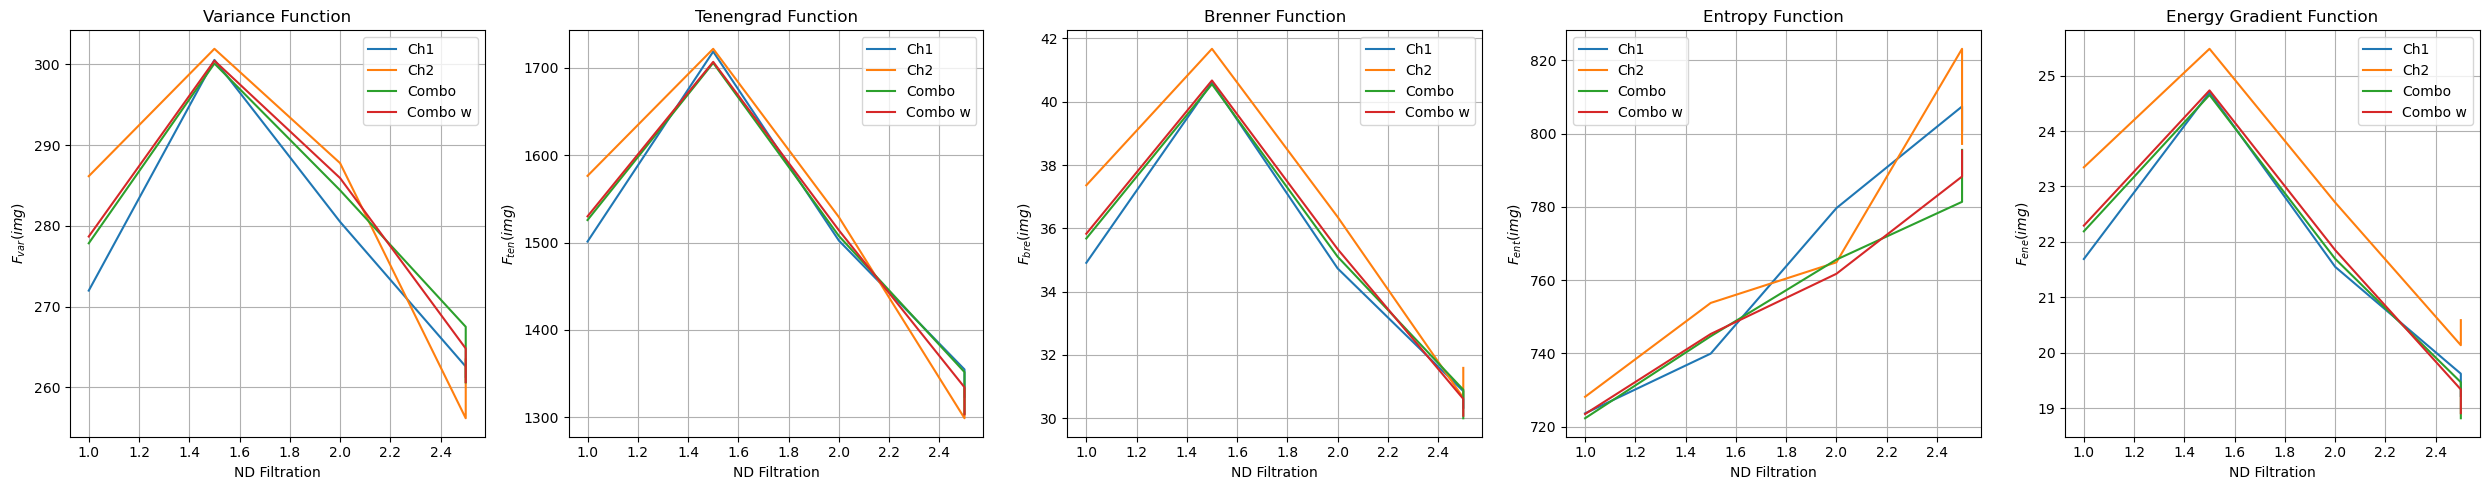

In [10]:
z_foci_total = [2.5, 2.5, 2.0, 1.5, 1.0]
# Display sharpness function trends:
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

# sharpness_vals = np.array()
ylabels = [r'$F_{var}(img)$', r'$F_{ten}(img)$', r'Diptest statistic', r'Diptest pvals', r'$F_{ent}(img)$', r'$F_{ene}(img)$', r'$F_{bre}(img)$']
titles = ['Variance Function', 'Tenengrad Function', 'Diptest Statistic', 'Diptest pvals', 'Entropy Function', 'Energy Gradient Function', 'Brenner Function']

ax[0].plot(z_foci_total, Ch1_f_var, label='Ch1')
ax[0].plot(z_foci_total, Ch2_f_var, label='Ch2')
ax[0].plot(z_foci_total, Combo_f_var, label='Combo')
ax[0].plot(z_foci_total, Combo_w_f_var, label='Combo w')
ax[0].set_xlabel('ND Filtration')
ax[0].set_ylabel(r'$F_{var}(img)$')
ax[0].grid(True)
ax[0].legend()
ax[0].set_title('Variance Function')

ax[1].plot(z_foci_total, Ch1_f_ten, label='Ch1')
ax[1].plot(z_foci_total, Ch2_f_ten, label='Ch2')
ax[1].plot(z_foci_total, Combo_f_ten, label='Combo')
ax[1].plot(z_foci_total, Combo_w_f_ten, label='Combo w')
ax[1].set_xlabel('ND Filtration')
ax[1].set_ylabel(r'$F_{ten}(img)$')
ax[1].grid(True)
ax[1].legend()
ax[1].set_title('Tenengrad Function')

ax[2].plot(z_foci_total, Ch1_f_bre, label='Ch1')
ax[2].plot(z_foci_total, Ch2_f_bre, label='Ch2')
ax[2].plot(z_foci_total, Combo_f_bre, label='Combo')
ax[2].plot(z_foci_total, Combo_w_f_bre, label='Combo w')
ax[2].set_xlabel('ND Filtration')
ax[2].set_ylabel(r'$F_{bre}(img)$')
ax[2].grid(True)
ax[2].legend()
ax[2].set_title('Brenner Function')

ax[3].plot(z_foci_total, Ch1_f_ent, label='Ch1')
ax[3].plot(z_foci_total, Ch2_f_ent, label='Ch2')
ax[3].plot(z_foci_total, Combo_f_ent, label='Combo')
ax[3].plot(z_foci_total, Combo_w_f_ent, label='Combo w')
ax[3].set_xlabel('ND Filtration')
ax[3].set_ylabel(r'$F_{ent}(img)$')
ax[3].grid(True)
ax[3].legend()
ax[3].set_title('Entropy Function')

ax[4].plot(z_foci_total, Ch1_f_ene, label='Ch1')
ax[4].plot(z_foci_total, Ch2_f_ene, label='Ch2')
ax[4].plot(z_foci_total, Combo_f_ene, label='Combo')
ax[4].plot(z_foci_total, Combo_w_f_ene, label='Combo w')
ax[4].set_xlabel('ND Filtration')
ax[4].set_ylabel(r'$F_{ene}(img)$')
ax[4].grid(True)
ax[4].legend()
ax[4].set_title('Energy Gradient Function')

# ax[0,2].plot(z_foci_total, Ch1_dips, label='Ch1')
# ax[0,2].plot(z_foci_total, Ch2_dips, label='Ch2')
# ax[0,2].set_xlabel('Z Focus (µm)')
# ax[0,2].set_ylabel('Diptest statistic')
# ax[0,2].legend()
# ax[0,2].set_title('Diptest Statistic')

# ax[0,3].plot(z_foci_total, Ch1_dip_ps, label='Ch1')
# ax[0,3].plot(z_foci_total, Ch2_dip_ps, label='Ch2')
# ax[0,3].set_xlabel('Z Focus (µm)')
# ax[0,3].set_ylabel('Diptest pvals')
# ax[0,3].legend()
# ax[0,3].set_title('Diptest pvals')

plt.tight_layout()
plt.show()

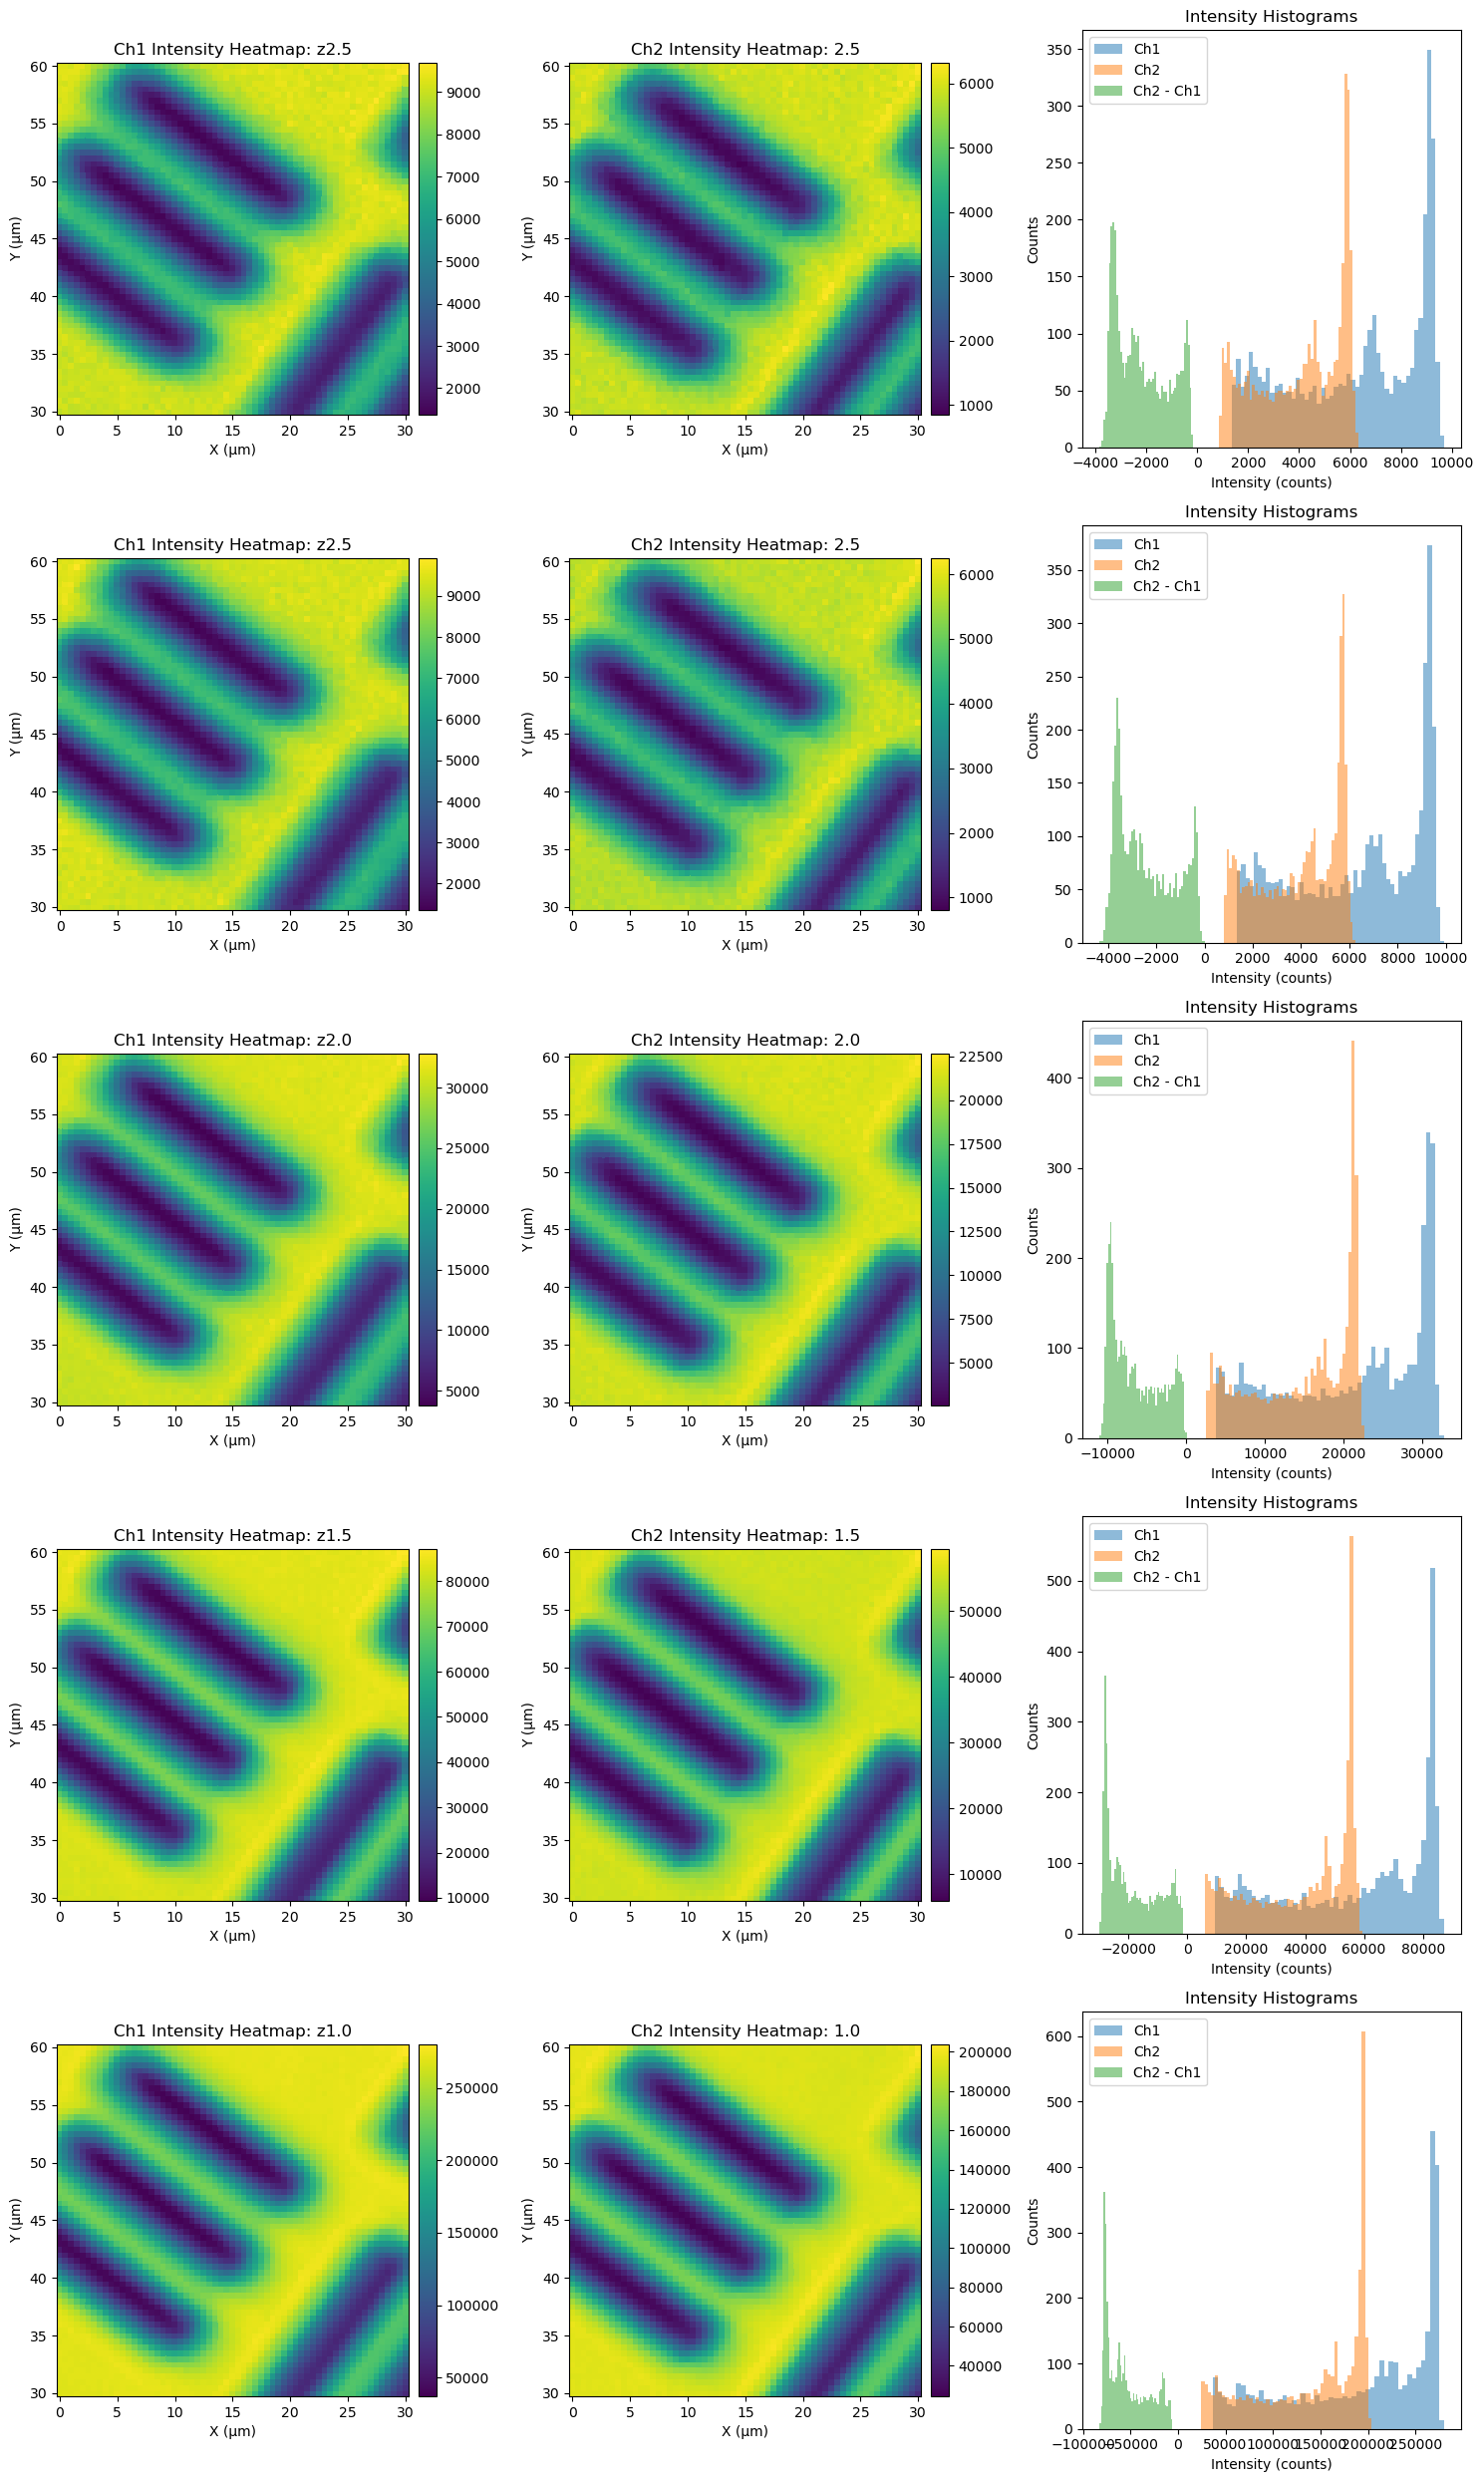

In [13]:
# Display heatmaps with corresponding Ch int histograms:
fig, ax = plt.subplots(len(Ch1_ints), 3, figsize=(15, 5*len(Ch1_ints)))
for i in range(len(Ch1_ints)):
    ax[i, 2].hist(Ch1_ints[i].flatten(), bins=50, alpha=0.5, label='Ch1')
    ax[i, 2].hist(Ch2_ints[i].flatten(), bins=50, alpha=0.5, label='Ch2')
    ax[i ,2].hist(Ch2_ints[i].flatten() - Ch1_ints[i].flatten(), bins=50, alpha=0.5, label='Ch2 - Ch1')
    ax[i, 2].set_xlabel('Intensity (counts)')
    ax[i, 2].set_ylabel('Counts')
    ax[i, 2].set_title('Intensity Histograms')
    ax[i,2].legend()

    plot1 = ax[i,0].pcolor(X_vecs[i], Y_vecs[i], Ch1_ints[i], cmap='viridis', ) #vmin=1000, vmax=12000)
    ax[i,0].set_aspect('equal')
    divider = make_axes_locatable(ax[i,0])
    cax1 = divider.append_axes("right", size="5%", pad=0.10)
    cb1 = plt.colorbar(plot1, cax=cax1, orientation='vertical')
    ax[i,0].set_xlabel('X (µm)')
    ax[i,0].set_ylabel('Y (µm)')
    ax[i,0].set_title('Ch1 Intensity Heatmap: z{}'.format(round(z_foci_total[i],3)))
    
    plot2 = ax[i,1].pcolor(X_vecs[i], Y_vecs[i], Ch2_ints[i], cmap='viridis') #, vmin=1000, vmax=12000)
    ax[i,1].set_aspect('equal')
    divider = make_axes_locatable(ax[i,1])
    cax2= divider.append_axes("right", size="5%", pad=0.10)
    cb2 = plt.colorbar(plot2, cax=cax2, orientation='vertical')
    ax[i,1].set_xlabel('X (µm)')
    ax[i,1].set_ylabel('Y (µm)')
    ax[i,1].set_title('Ch2 Intensity Heatmap: {}'.format(round(z_foci_total[i], 3)))
plt.tight_layout()
# fig.suptitle('Intensity Heatmaps and Histograms for {}'.format('2023-08-02_MH-01-17_DropCast 12 and 13'))
plt.show()



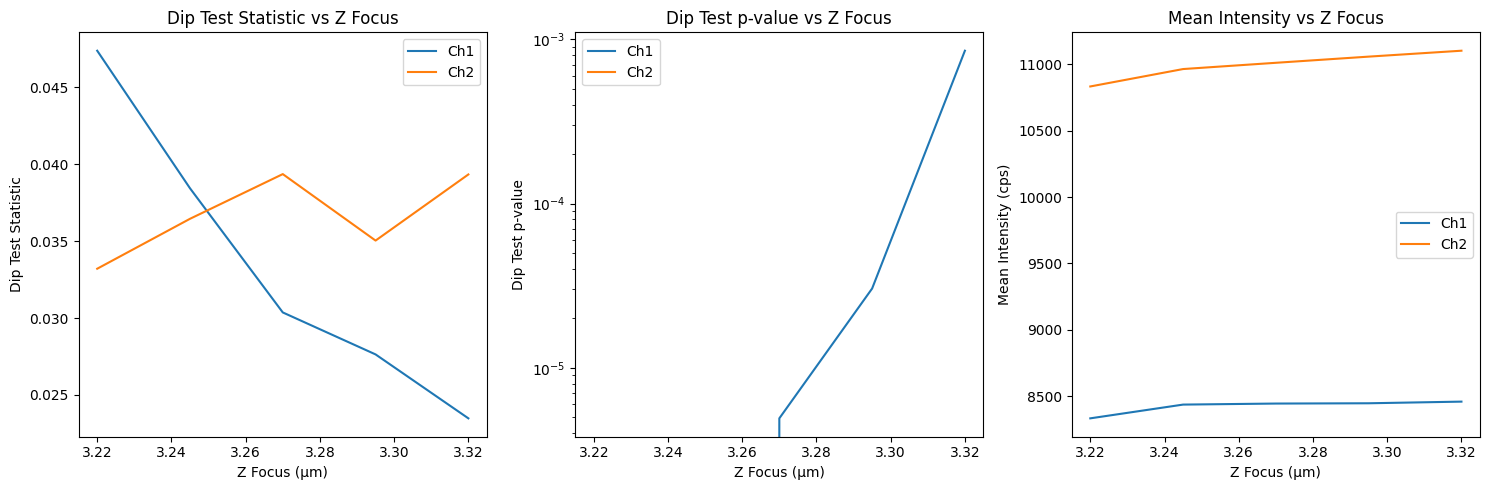

In [49]:
ch1_diptest_vals = []
ch1_pvals = []
ch2_diptest_vals = []
ch2_pvals = []
ch1_means = []
ch2_means = []
for i in range(len(Ch1_ints)):
    dip, p = spa.hartigans_diptest(Ch1_ints[i].flatten())
    ch1_diptest_vals.append(dip)
    ch1_pvals.append(p)

    dip, p = spa.hartigans_diptest(Ch2_ints[i].flatten())
    ch2_diptest_vals.append(dip)
    ch2_pvals.append(p)

    ch1_means.append(np.mean(Ch1_ints[i].flatten()))
    ch2_means.append(np.mean(Ch2_ints[i].flatten()))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(z_foci, ch1_diptest_vals, label='Ch1')
ax[0].plot(z_foci, ch2_diptest_vals, label='Ch2')
ax[0].set_xlabel('Z Focus (µm)')
ax[0].set_ylabel('Dip Test Statistic')
ax[0].set_title('Dip Test Statistic vs Z Focus')
ax[0].legend()

ax[1].plot(z_foci, ch1_pvals, label='Ch1')
ax[1].plot(z_foci, ch2_pvals, label='Ch2')
ax[1].set_yscale('log')
ax[1].set_xlabel('Z Focus (µm)')
ax[1].set_ylabel('Dip Test p-value')
ax[1].set_title('Dip Test p-value vs Z Focus')
ax[1].legend()

ax[2].plot(z_foci, ch1_means, label='Ch1')
ax[2].plot(z_foci, ch2_means, label='Ch2')
ax[2].set_xlabel('Z Focus (µm)')
ax[2].set_ylabel('Mean Intensity (cps)')
ax[2].set_title('Mean Intensity vs Z Focus')
ax[2].legend()

plt.tight_layout()
plt.show()

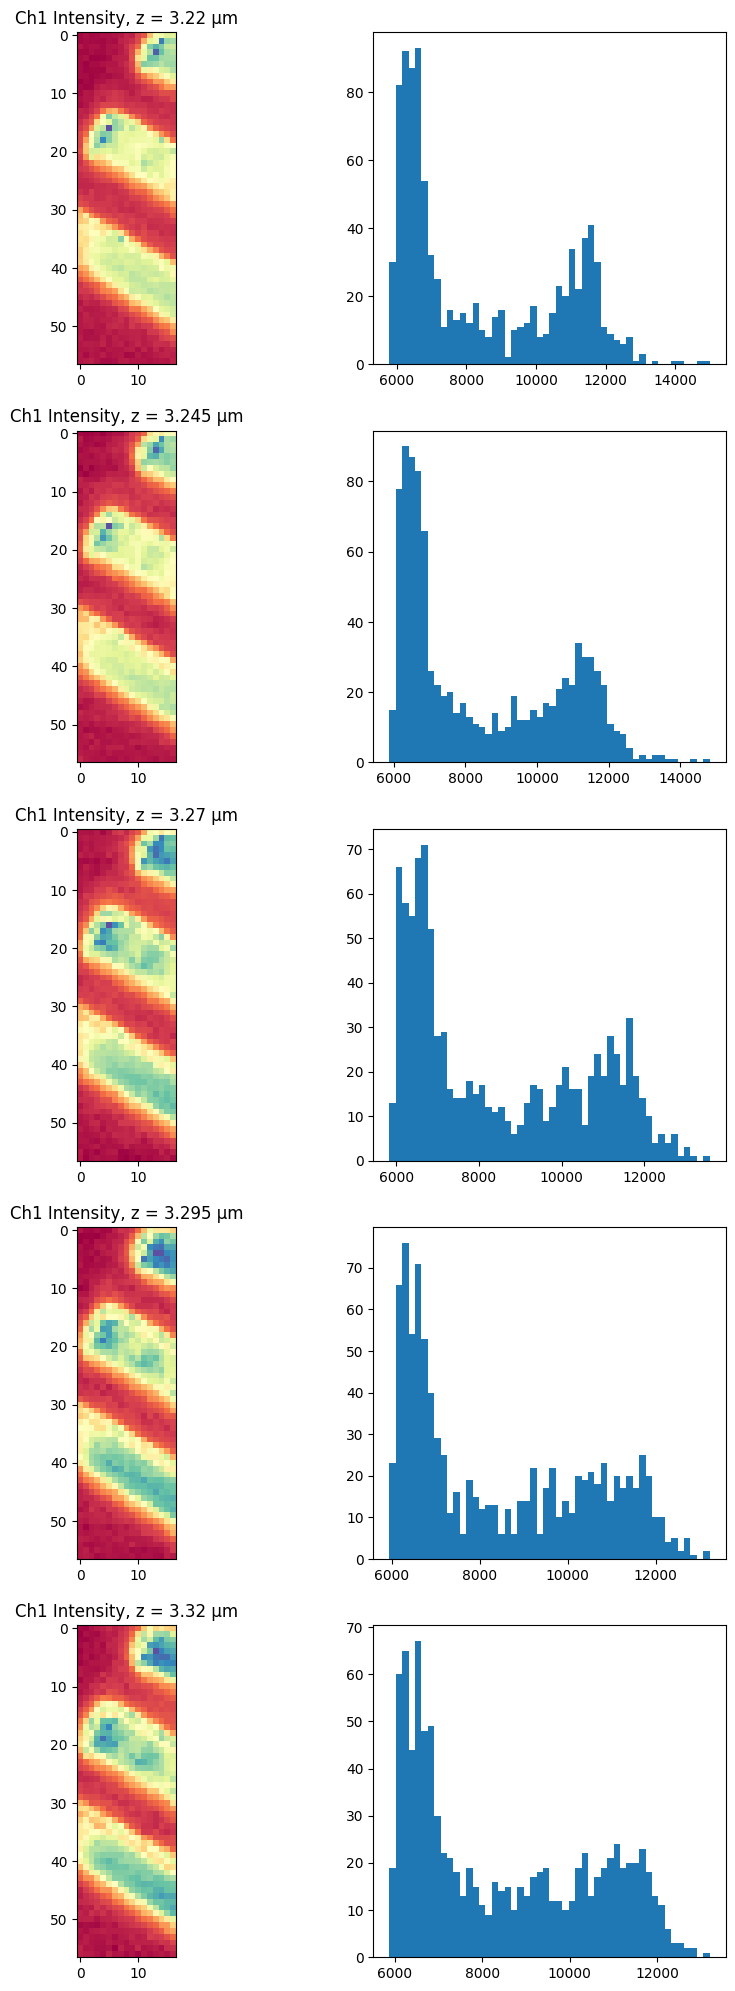

In [50]:
# Plots to align for Channel 1 only:
fig, ax = plt.subplots(len(Ch1_ints), 2, figsize=(10, 5*len(Ch1_ints)))
for i in range(len(Ch1_ints)):
    ax[i,0].imshow(Ch1_ints[i], cmap='Spectral', interpolation='nearest')
    ax[i,0].set_title('Ch1 Intensity, z = {} µm'.format(z_foci[i]))
    ax[i,1].hist(Ch1_ints[i].flatten(), bins=50)

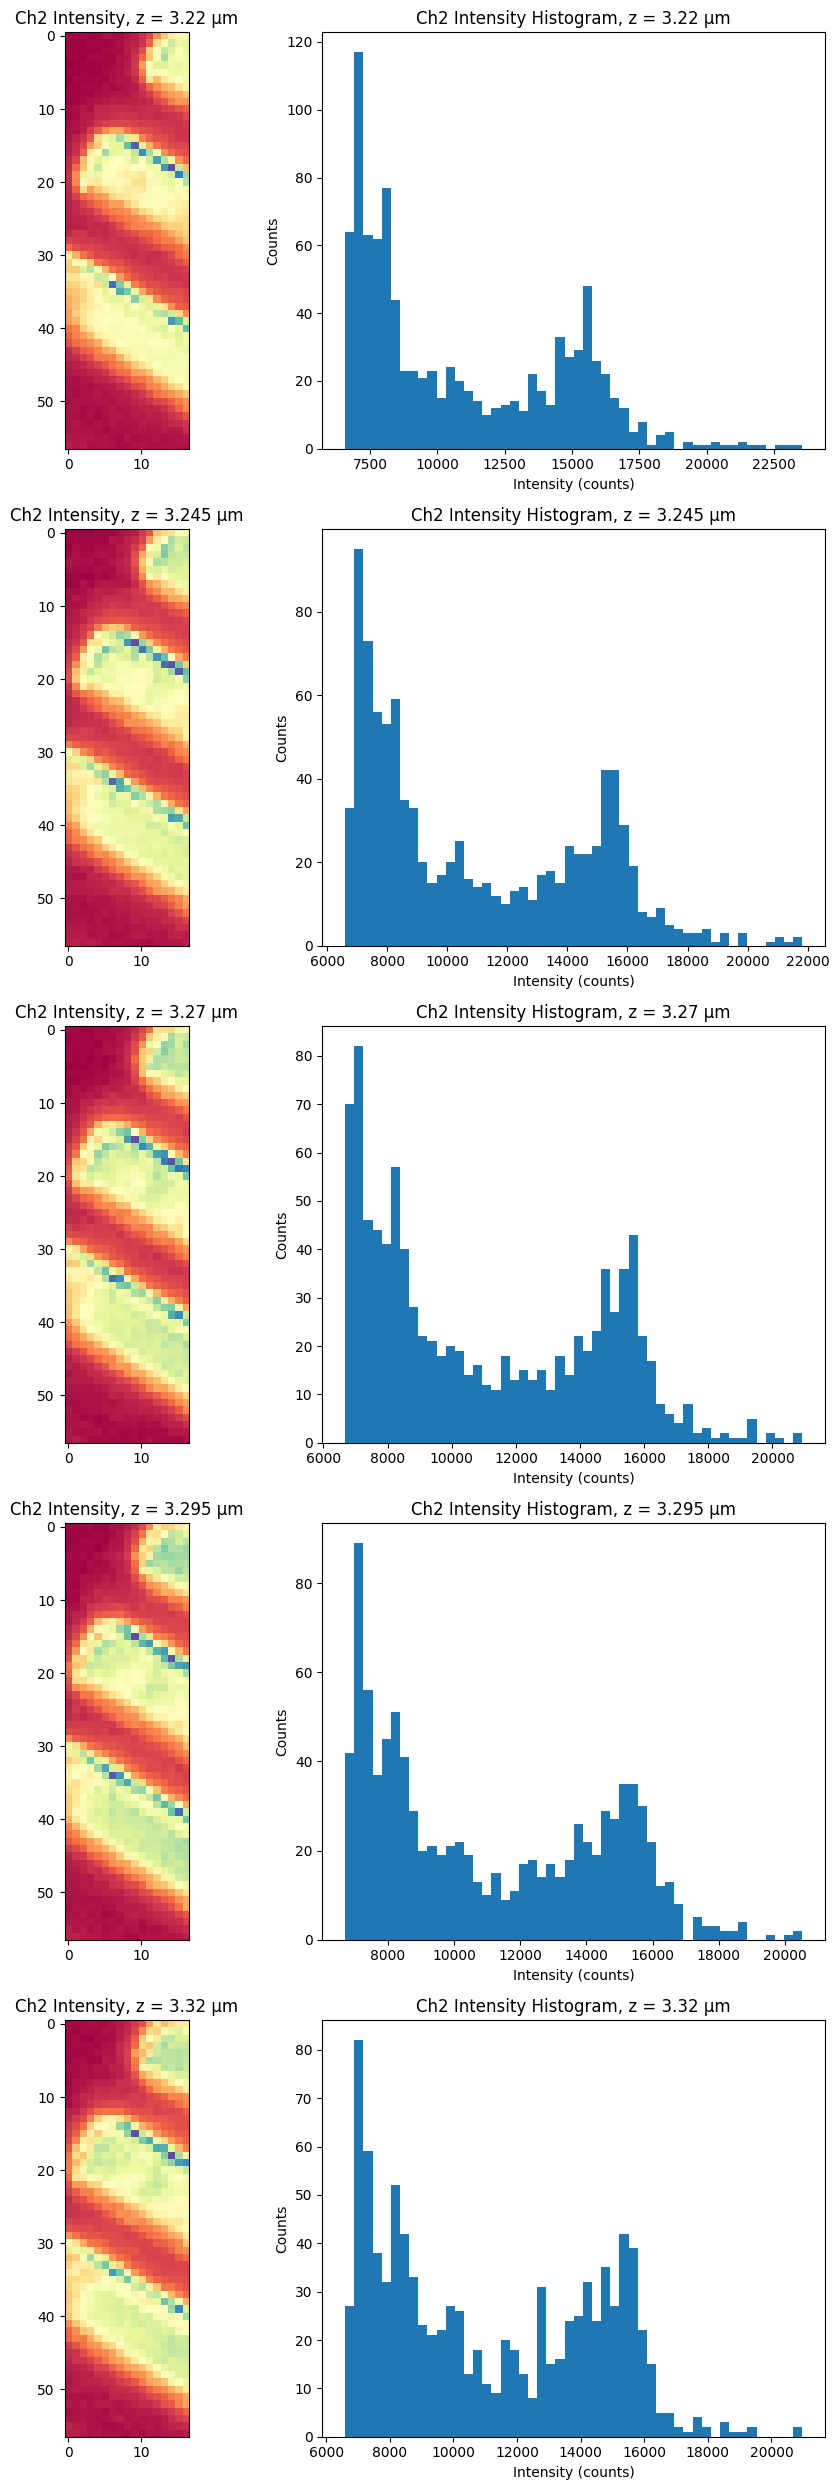

In [51]:
# Plots to align for Channel 1 only:
fig, ax = plt.subplots(len(Ch2_ints), 2, figsize=(10, 5*len(Ch2_ints)))
for i in range(len(Ch2_ints)):
    ax[i,0].imshow(Ch2_ints[i], cmap='Spectral', interpolation='nearest')
    ax[i,0].set_title('Ch2 Intensity, z = {} µm'.format(z_foci[i]))
    ax[i,1].hist(Ch2_ints[i].flatten(), bins=50)
    ax[i,1].set_title('Ch2 Intensity Histogram, z = {} µm'.format(z_foci[i]))
    ax[i,1].set_xlabel('Intensity (counts)')
    ax[i,1].set_ylabel('Counts')
plt.tight_layout()
plt.show()

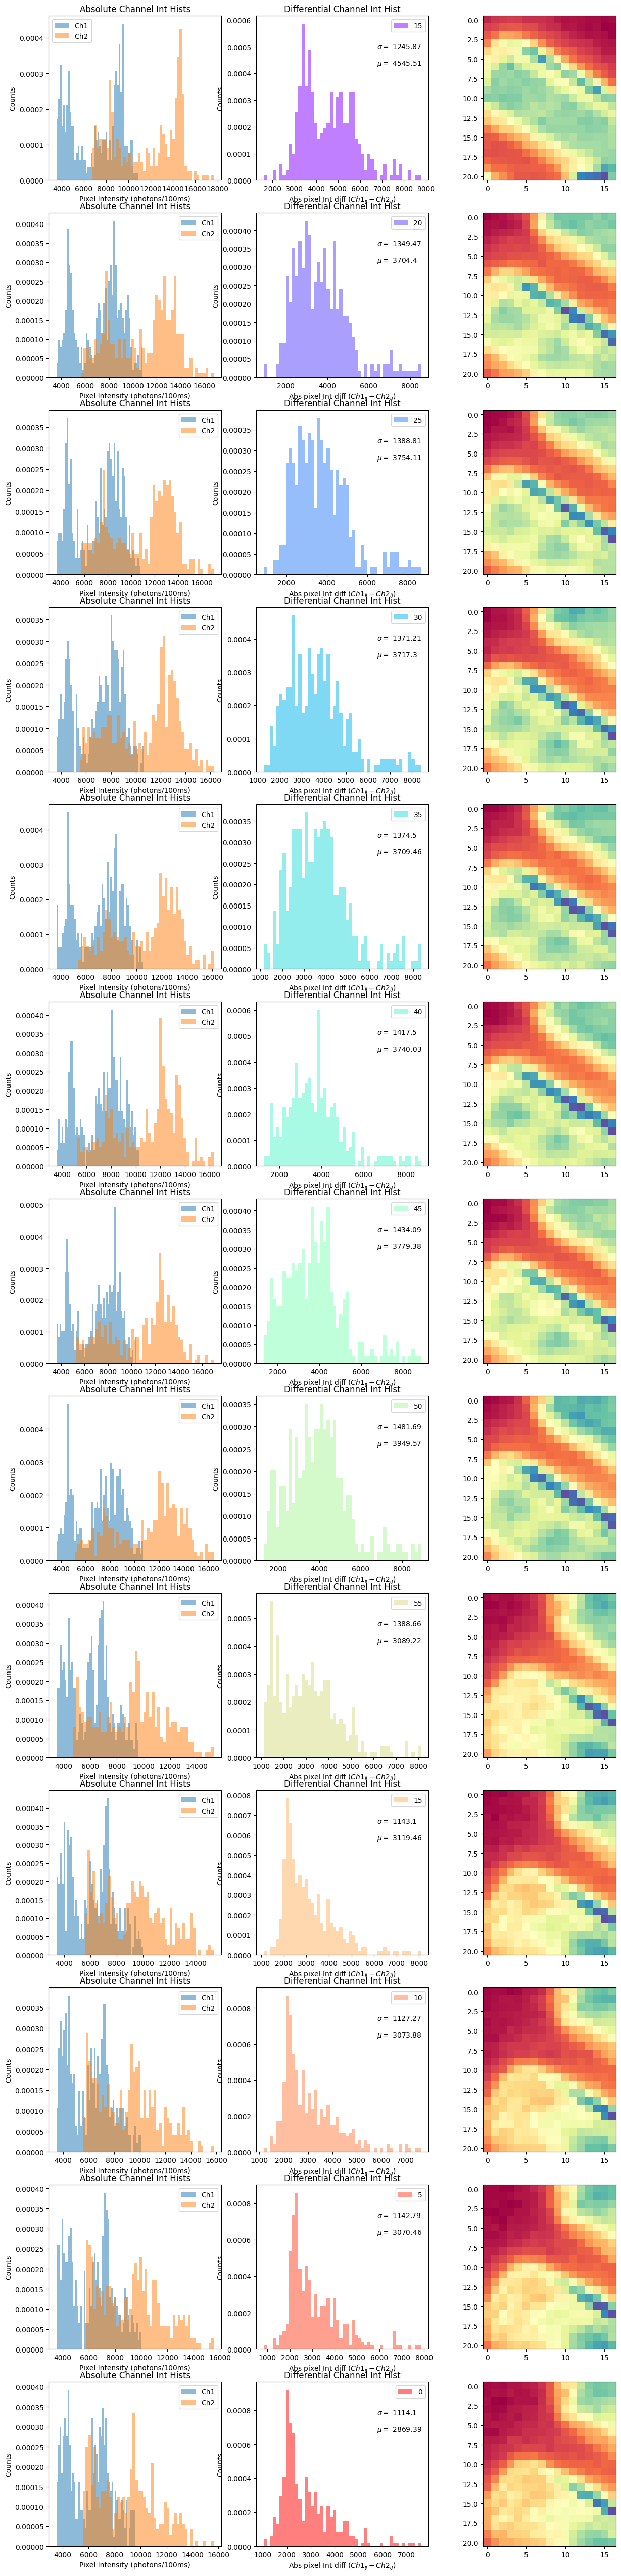

In [61]:
normalize=False

# fig, ax = plt.subplots(1,2,figsize=(10,5))

fig, ax = plt.subplots(len(Ch1_ints), 3, figsize=(5*3, 5*len(Ch1_ints)))

colors=cm.rainbow(np.linspace(0,1,len(Ch1_ints)))

for i in range(len(Ch1_ints)):
    if not normalize:
        ax[i,0].hist(Ch1_ints[i].flatten(), bins=50, alpha=0.5,  density=True, label='Ch1')
        ax[i,0].hist(Ch2_ints[i].flatten(), bins=50, alpha=0.5,  density=True ,label='Ch2')
        ax[i,0].set_xlabel('Pixel Intensity (photons/100ms)')
        ax[i,0].set_title('Absolute Channel Int Hists')
    else:
        norm_func = lambda x: x/np.max(x)
        norm_ch1 = norm_func(Ch1_ints[i])
        norm_ch2 = norm_func(Ch2_ints[i])
        ax[i,0].hist(norm_ch1.flatten(), bins=50, alpha=0.5,  density=True, label='Ch1')
        ax[i,0].hist(norm_ch2.flatten(), bins=50, alpha=0.5,  density=True ,label='Ch2')
        ax[i,0].set_xlabel('Normed Pixel Intensity (normed photons/100ms)')
        ax[i,0].set_title('Norm Channel Int Hists')

    ax[i,0].legend()
    ax[i,0].set_ylabel('Counts')

    channel_dif_ints = Ch2_ints[i] - Ch1_ints[i]
    sigma = np.std(channel_dif_ints)
    xbar = np.mean(channel_dif_ints)
    dip, pval = diptest.diptest(channel_dif_ints)
    
    ax[i,1].hist(channel_dif_ints.flatten(), bins=50, density=True, label='{}'.format(scan_z_vals[i]), alpha=0.5, color=colors[i])
    ax[i,1].text(0.7, 0.8, r"$\sigma =$ {}".format(round(sigma, 2)), transform = ax[i,1].transAxes)
    ax[i,1].text(0.7, 0.7, r"$\mu =$ {}".format(round(xbar, 2)), transform = ax[i,1].transAxes)
    ax[i,1].legend()
    ax[i,1].set_xlabel(r'Abs pixel Int diff $(Ch1_{ij} - Ch2_{ij})$')
    ax[i,1].set_ylabel('Counts')
    ax[i,1].set_title('Differential Channel Int Hist')
    
    ax[i,2].imshow(Ch2_ints[i], cmap='Spectral', interpolation='nearest')

plt.show()

13 13


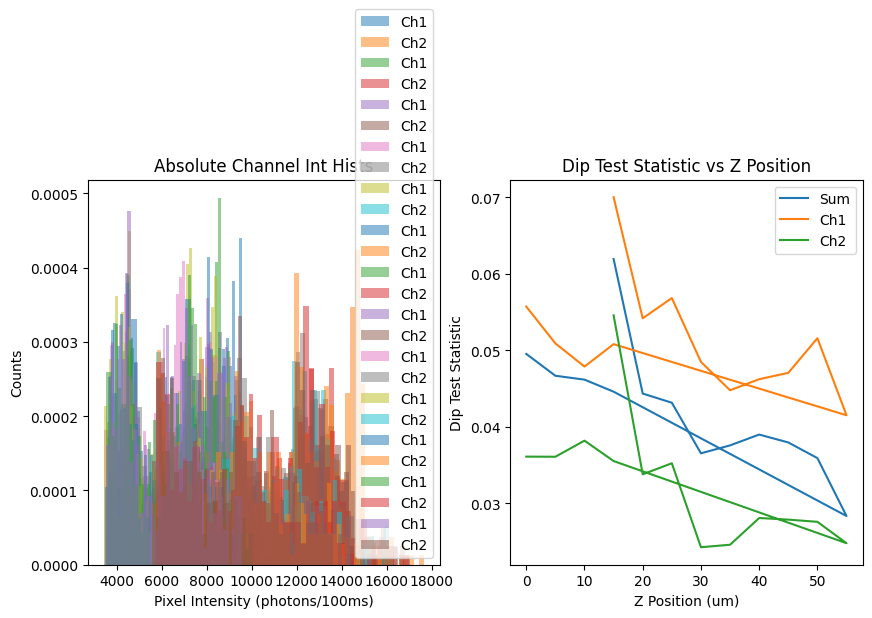

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i in range(len(Ch1_ints)):
    ax[0].hist(Ch1_ints[i].flatten(), bins=50, alpha=0.5,  density=True, label='Ch1')
    ax[0].hist(Ch2_ints[i].flatten(), bins=50, alpha=0.5,  density=True ,label='Ch2')
    ax[0].set_xlabel('Pixel Intensity (photons/100ms)')
    ax[0].set_title('Absolute Channel Int Hists')
ax[0].legend()
ax[0].set_ylabel('Counts')


dips1 = [diptest.diptest(Ch1_ints[i].flatten())[0] for i in range(len(Ch1_ints))]
dips2 = [diptest.diptest(Ch2_ints[i].flatten())[0] for i in range(len(Ch2_ints))]
dips = [diptest.diptest((Ch1_ints[i] + Ch2_ints[i]).flatten())[0] for i in range(len(Ch1_ints))]
print(len(scan_z_vals), len(dips))

ax[1].plot(scan_z_vals, dips, label='Sum')
ax[1].plot(scan_z_vals, dips1, label='Ch1')
ax[1].plot(scan_z_vals, dips2, label='Ch2')
ax[1].set_xlabel('Z Position (um)')
ax[1].set_ylabel('Dip Test Statistic')
ax[1].set_title('Dip Test Statistic vs Z Position')
ax[1].legend()


In [15]:
def norm_ints(ints):
    return ints/np.max(ints)

def euc_norm_ints(ints):
    return ints/np.linalg.norm(ints)

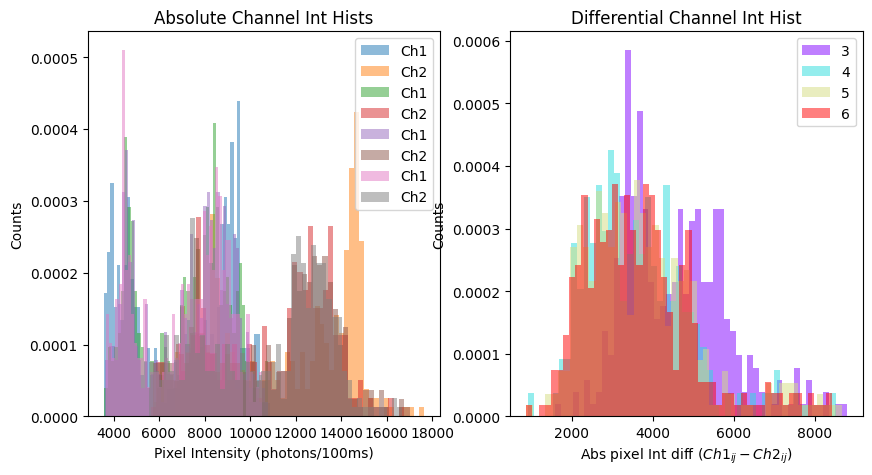

In [27]:
normalize=False

fig, ax = plt.subplots(1,2,figsize=(10,5))

colors=cm.rainbow(np.linspace(0,1,len(Ch1_ints)))

if not normalize:
    for i in range(len(Ch1_ints)):
        ax[0].hist(Ch1_ints[i].flatten(), bins=50, alpha=0.5,  density=True, label='Ch1')
        ax[0].hist(Ch2_ints[i].flatten(), bins=50, alpha=0.5,  density=True ,label='Ch2')
        channel_dif_ints = Ch2_ints[i] - Ch1_ints[i]
        ax[1].hist(channel_dif_ints.flatten(), bins=50, density=True, label='{}'.format(i+3), alpha=0.5, color=colors[i])
    
    ax[0].set_xlabel('Pixel Intensity (photons/100ms)')
    ax[0].set_ylabel('Counts')
    ax[0].set_title('Absolute Channel Int Hists')
    ax[0].legend()

    ax[1].set_xlabel(r'Abs pixel Int diff $(Ch1_{ij} - Ch2_{ij})$')
    ax[1].set_ylabel('Counts')
    ax[1].set_title('Differential Channel Int Hist')
    ax[1].legend()


else:
    for i in range(len(Ch1_ints)):
        ax[0].hist(norm_ch1[i].flatten(), bins=50, alpha=0.5,  density=True, label='Ch1')
        ax[0].hist(norm_ch2[i].flatten(), bins=50, alpha=0.5,  density=True ,label='Ch2')
        channel_dif_ints = Ch2_ints[i] - Ch1_ints[i]
        ax[1].hist(channel_dif_ints.flatten(), bins=50, density=True, label='{}'.format(i+3), alpha=0.5, color=colors[i])
    
    ax[0].set_xlabel('Normed Pixel Intensity (normed photons/100ms)')
    ax[0].set_ylabel('Counts')
    ax[0].set_title('Norm Channel Int Hists')
    ax[0].legend()

    ax[1].set_xlabel(r'Abs pixel Int diff $(Ch1_{ij} - Ch2_{ij})$')
    ax[1].set_ylabel('Counts')
    ax[1].set_title('Differential Channel Int Hist')
    ax[1].legend()

plt.show()

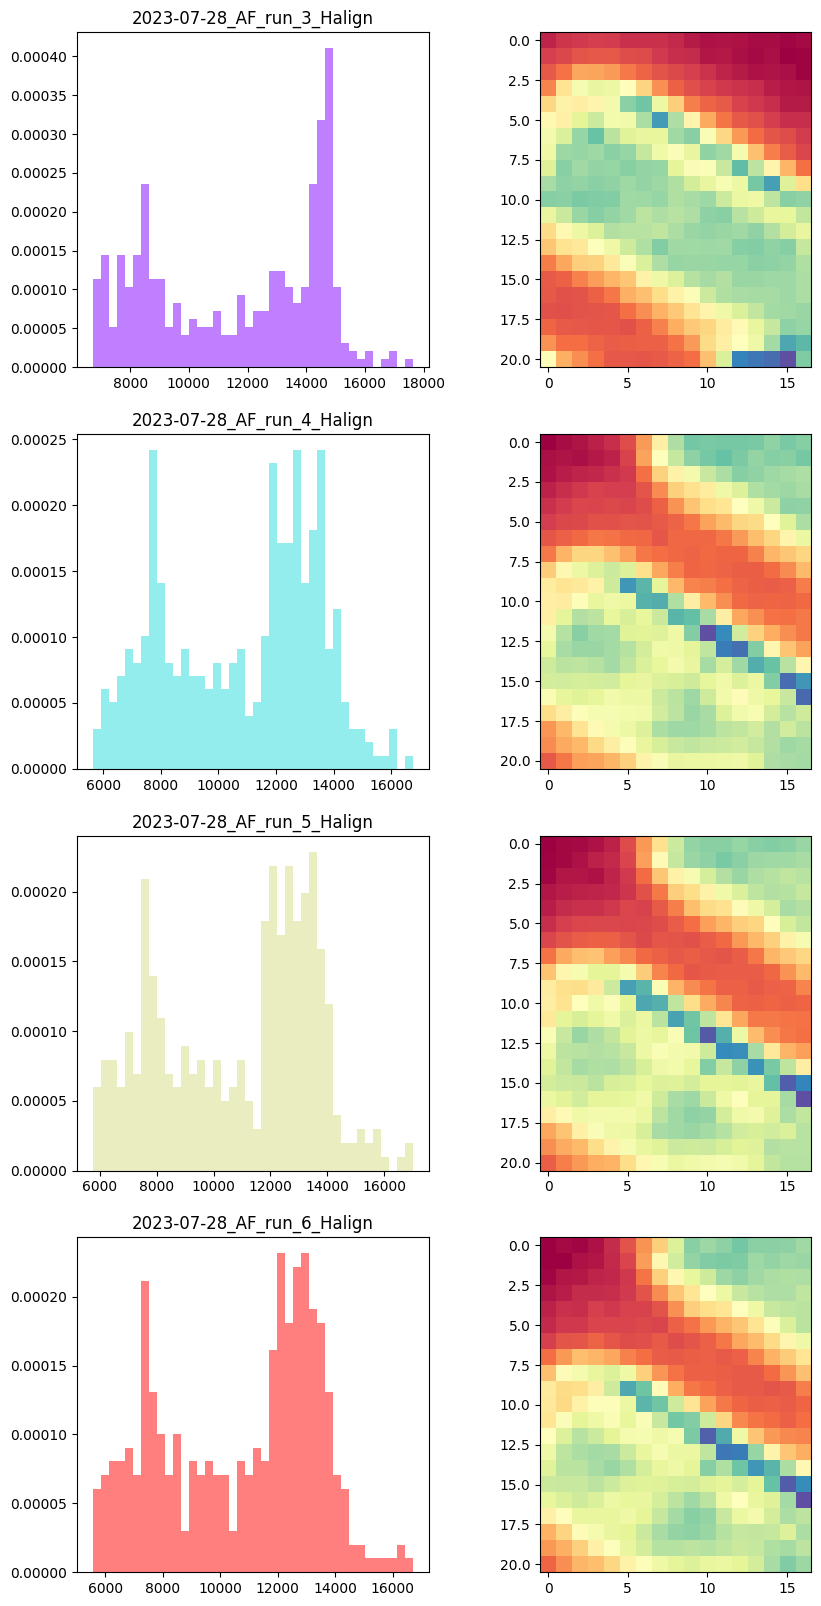

In [31]:
from matplotlib.pyplot import cm

fig, ax = plt.subplots(len(Ch1_ints), 2, figsize=(10, 5*len(Ch1_ints)))
#colors = ['red', 'orange', 'yellow', 'green', 'blue']
colors=cm.rainbow(np.linspace(0,1,len(Ch1_ints)))
for i, run in enumerate(Ch2_ints):
    ax[i, 0].hist(run.flatten(), bins=40, alpha=0.5,  density=True, color=colors[i]) #histtype='step'
    ax[i, 0].set_title('{}'.format(scan_names[i]))
    ax[i, 1].imshow(run, cmap='Spectral', interpolation='nearest')
    
plt.show()

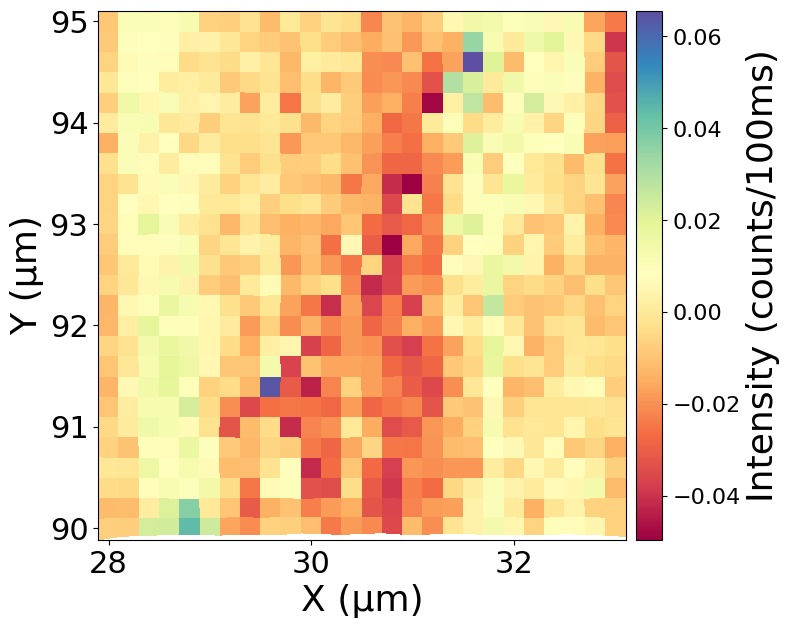

In [79]:
scan_name1 = '2023-07-26_AF_run_20_G7'
scan_name2 = '2023-07-26_AF_run_21_G7'
save = False
Xs1, Ys1, Ts1, Ch1_ints1, Ch2_ints1 = spa.load_scan_data(5, 5, .1, '{}_scan_data.txt'.format(scan_name1))
Xs2, Ys2, Ts2, Ch1_ints2, Ch2_ints2 = spa.load_scan_data(5, 5, .1, '{}_scan_data.txt'.format(scan_name2))

spa.plot_int_heatmap(Xs1, Ys1, Ch2_ints1/np.max(Ch2_ints1) - Ch2_ints2/np.max(Ch2_ints2), size=(8, 8), save=False, save_name='{}_ch1.png'.format(scan_name1))
# spa.plot_int_heatmap(Xs1, Ys1, Ch2_ints2/np.max(Ch2_ints2) - Ch1_ints2/np.max(Ch1_ints2), size=(8, 8), save=False, save_name='{}_ch1.png'.format(scan_name2))
# plt.hist((Ch1_ints2/np.max(Ch1_ints2)).flatten(),bins=50,alpha=0.5,color='red')
# plt.hist((Ch2_ints2/np.max(Ch2_ints2)).flatten(),bins=50,alpha=0.5,color='blue')

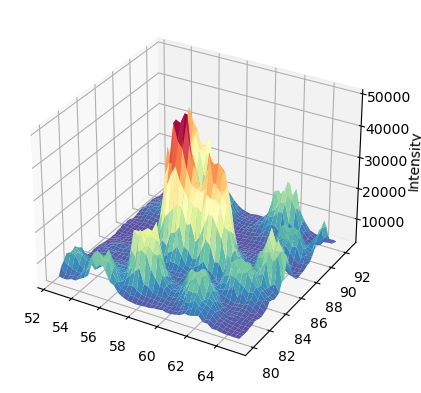

In [3]:
# %matplotlib notebook
path = r'C:\Users\spmno\OneDrive\Documents\spm\Scan\Scan Data\2023-08-03'
scan_name=r'{}\2023-08-03_MH-01-17_DropCast_25'.format(path)

Xs1, Ys1, T1s, Ch1_ints1, Ch2_ints1 = spa.load_scan_data(12.5, 12.5, 0.3, '{}_scan_data.txt'.format(scan_name))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Xs1, Ys1, Ch1_ints1 + Ch2_ints1, cmap='Spectral_r')
ax.set_zlabel('Intensity')
plt.show()



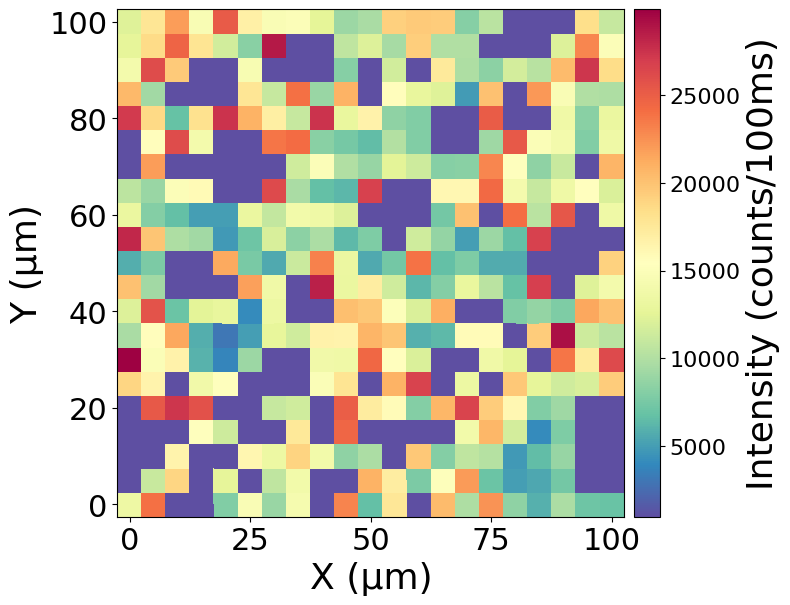

In [56]:
# %matplotlib notebook
%matplotlib inline
path = r'C:\Users\spmno\OneDrive\Documents\spm\Scan\Scan Data\2023-08-03'
scan_name=r'{}\2023-08-03_MH-01-17_DropCast_38'.format(path)

Xs1, Ys1, T1s, Ch1_ints1, Ch2_ints1 = spa.load_scan_data(100, 100, 5, '{}_scan_data.txt'.format(scan_name))

#Ch1_ints1[Ch1_ints1 > 15000] = 3000
#Ch2_ints1[Ch2_ints1 > 15000] = 3000

ints = Ch1_ints1 + Ch2_ints1

ints[ints > 30000] = 1000

axis_label_size = 26
axis_tick_size = 22
cb_label_size = 26
cb_tick_size = 16

fig, ax = plt.subplots(1, 1, figsize=(8,8))

plot = ax.pcolor(Xs1, Ys1, ints, cmap='Spectral_r', shading='auto')
ax.set_aspect('equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.10)
cb = plt.colorbar(plot, cax=cax, orientation='vertical')
cb.ax.tick_params(labelsize=cb_tick_size)
cb.set_label(label='Intensity (counts/100ms)', fontsize=cb_label_size)

# ax.autoscale(tight=True)
ax.set_xlabel('X (µm)', fontsize=axis_label_size)
ax.set_ylabel('Y (µm)', fontsize=axis_label_size)
ax.tick_params(axis='both', which='major', labelsize=axis_tick_size)
# ax.set_title(title, fontsize=26, pad=20)
plt.tight_layout()

# spa.plot_int_heatmap(Xs1, Ys1, ints)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(Xs1, Ys1, Ch1_ints1 + Ch2_ints1, cmap='Spectral_r')
# ax.set_zlabel('Intensity')
plt.show()

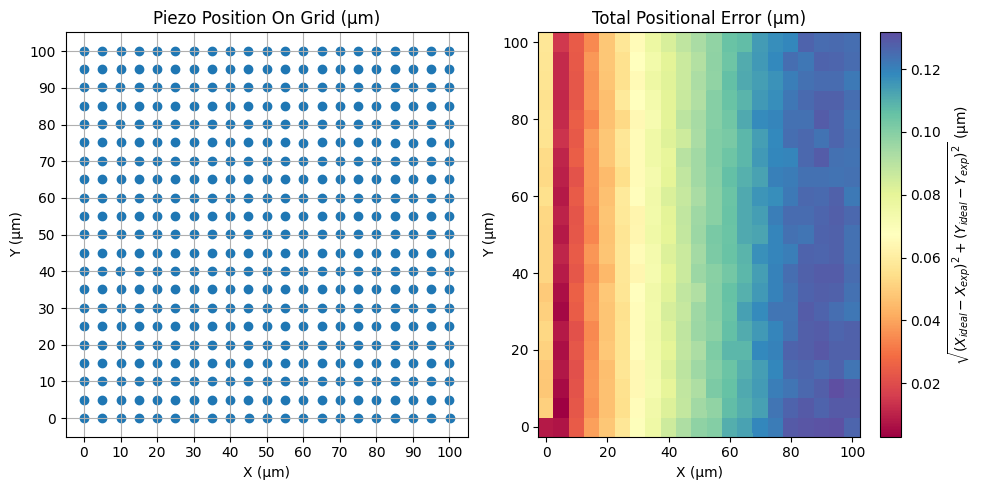

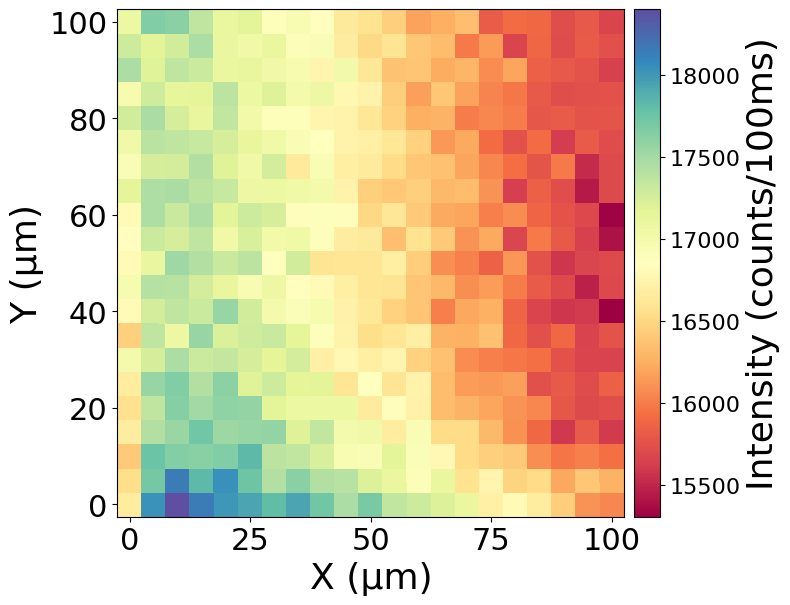

In [83]:
path = r'C:\Users\spmno\OneDrive\Documents\spm\Scan\Scan Data\2023-08-03'
scan_name=r'{}\2023-08-03_MH-01-17_DropCast_22'.format(path)

Xs1, Ys1, T1s, Ch1_ints1, Ch2_ints1 = spa.load_scan_data(100, 100, 5, '{}_scan_data.txt'.format(scan_name))

# spa.plot_channel_hists(Xs1, Ys1, Ch1_ints1, Ch2_ints1, normalize=False)
spa.plot_positions_and_error(Xs1.T,Ys1.T, 5, xlim = (0, 100), ylim = (0, 100))
spa.plot_int_heatmap(Xs1, Ys1, Ch1_ints1, size=(8, 8), save=False, save_name='scan.png')

In [41]:
scan_name1 = r'{}\2023-08-01_AF_run_10_align_z2.886'.format(path)
save = False
Xs1, Ys1, Ts1, Ch1_ints1, Ch2_ints1 = spa.load_scan_data(14, 4, 0.5, '{}_scan_data.txt'.format(scan_name))
# Xs2, Ys2, Ts2, Ch1_ints2, Ch2_ints2 = spa.load_scan_data(5, 5, .2, '{}_scan_data.txt'.format(scan_name2))

spa.plot_int_heatmap(Xs1, Ys1, Ch1_ints1, size=(8, 8), save=False, save_name='{}_ch1.png'.format(scan_name1))

ValueError: cannot reshape array of size 969 into shape (29,9)

In [ ]:
print(np.linspace(6.6, 7.3, 5))

[6.6   6.775 6.95  7.125 7.3  ]
